# Number of PSMs and detections in the original phosphopedia data

In [1]:
from util import ORIGINAL_PHOSPHOPEDIA_STATISTICS
from util.containers import *
from util.plotting import *

## Intro:

The main goal of Phosphopedia is to be able to continuously add in new data as we find datasets that we think will enhance in the information in the resource. In building an automated pipeline, many components needed to be substituted and revamped to accomodate growing amounts of data. Thus, I have built the database using both the original data as well as an increased set of data to determine the effect of both the pipeline and the chosen repositories in the final amount of PSMs, Peptides, and Sites. In this notebook, I will solely focus on how the new pipeline treats the old dataset.

## Analysis of unmatched build

In [2]:
build = DatabaseBuild("data/builds/human_phospho/original_20210907/")

Loading PSMs...
Loading Peptides...
Loading Phosphosites


#### FDR at PSM, Peptide, and Site Level


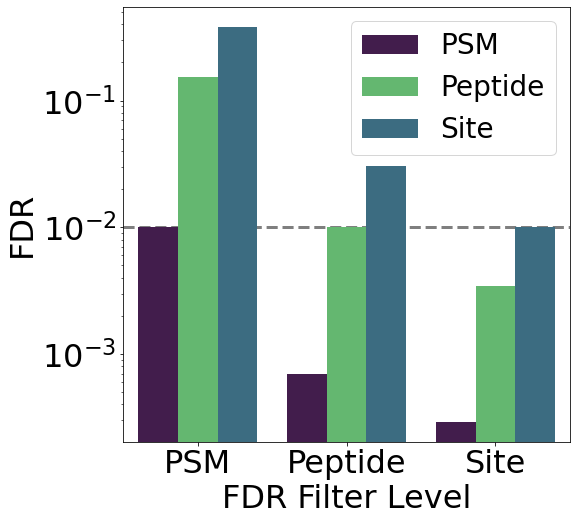

In [3]:
plot_fdr(build)

The above plot very much demonstrates the accumulation of false positives in the database. Cutting off the data at a 1% PSM FDR leads to huge FDR errors at the Peptide and Site level. Even cutting off the FDR at the peptide level leads to the accumulation of potentially spurious sites. Instead, we need to be careful to control FDR at each level if we are going to provide correct information for the community.

#### Total number of matches and detections with increasingly stringent cutoffs.

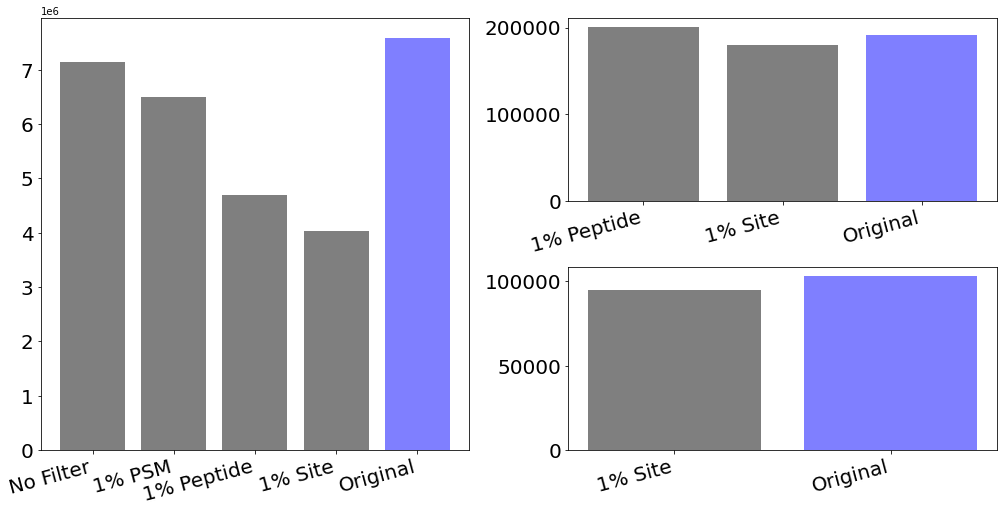

In [4]:
plot_detections(build, ORIGINAL_PHOSPHOPEDIA_STATISTICS)

A stark drop in the number of matches and detections is apparent here. One reason for that is likely the removal of certain scores from the Comet output which have been deemed unsuitable for calculating true vs spurious hits. The removal of these scores always tended to lead to lower detection rates in small scale experiments. Thus, the baseline for looking at the increase in matches and detections with the new data needs to be considered against the new pipeline on the old data to make the numbers comparable.

#### Local filewise FDR

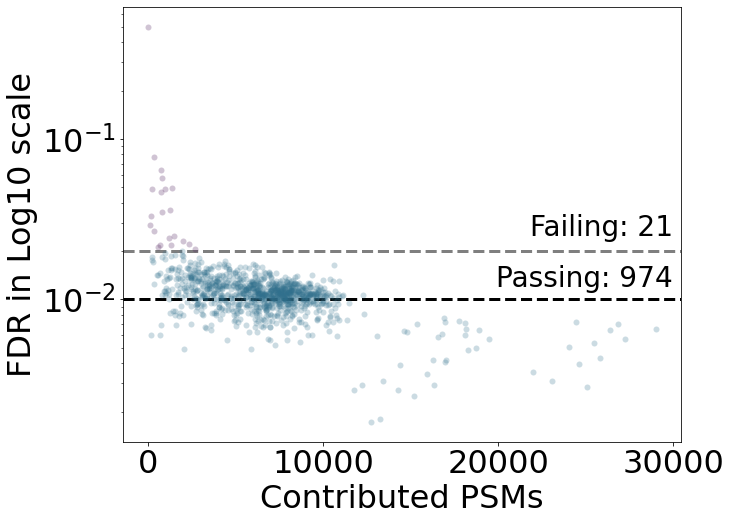

In [5]:
plot_filewise_fdr(build)

This phenomena is fairly expected. Given that we control the FDR globally accross the database, it is easy for individual files to have a higher FDR. Luckily, these do not tend to add signicant amounts of PSMs to the database, implying that the majority of hits are good.

## Analysis of matched build

The final build which we hand to users is the one provided in the database. This has detections matched at each level and represents our final filtering of the full database. For this section, we will load the build straight from the database and directly analyze that data.

In [6]:
%%time
build = DatabaseBuild("data/builds/human_phospho/original_20210907/phosphopedia.db")

Loading PSMs...
Loading Peptides...
Loading Phosphosites
CPU times: user 18.5 s, sys: 1.8 s, total: 20.3 s
Wall time: 15min 32s


#### Charge states detected per peptide

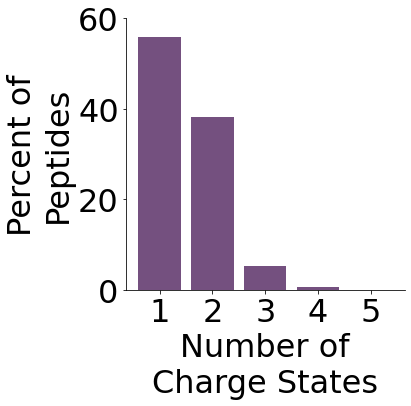

In [7]:
plot_number_of_charges(build)

#### MS2 Instrument types per peptide

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect("data/builds/human_phospho/original_20210907/phosphopedia.db")
sample_ms2_analyzers = pd.read_sql(
    """
    SELECT s.sampleName, p.ms2Analyzer
    FROM sample s 
    LEFT JOIN parameters p 
    ON s.id = p.sampleId
    """,
    conn
    )

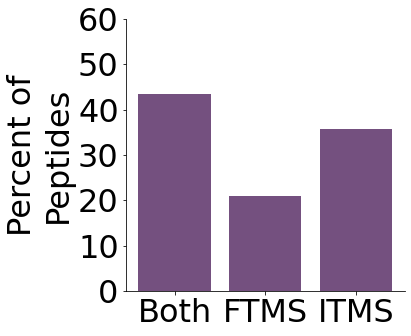

In [10]:
plot_number_of_analyzers(build, sample_ms2_analyzers)

The last two plots will be interesting when we compare them across database builds. We expect that many peptides will be identified multiple times with the increase in data. This will lead to representations of the peptides in more charge states as well as being able to find peptides in both the FTMS and ITMS data. 